<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
class ScratchSVMClassifier():

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        # ラグランジュ乗数の初期化
        self.lam = np.zeros(n_samples)

        for _ in range(self.iter):
            # ラグランジュ乗数の更新
            for i in range(n_samples):
                # 勾配計算（例：線形カーネルの場合）
                gradient = 1 - y[i] * np.sum(self.lam * y * np.dot(X, X[i]))

                # ラグランジュ乗数の更新 (学習率を考慮)
                self.lam[i] += self.lr * gradient

                # ラグランジュ乗数の制約条件を満たすようにクリッピング
                self.lam[i] = max(0, min(self.lam[i], 1))  # 例：0 <= lam <= 1

            # サポートベクターの選択 (閾値を用いる)
            self.index_support_vectors = np.where(self.lam > self.threshold)[0]
            self.n_support_vectors = len(self.index_support_vectors)
            self.X_sv = X[self.index_support_vectors]
            self.lam_sv = self.lam[self.index_support_vectors]
            self.y_sv = y[self.index_support_vectors]

            # verboseモードの場合、学習過程を出力
            if self.verbose:
                print(f"Iteration {_}: Number of support vectors = {self.n_support_vectors}")



    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            # 推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算
            if self.kernel == 'linear':
                kernel_values = np.dot(self.X_sv, X[i])
            elif self.kernel == 'poly':
                kernel_values = (np.dot(self.X_sv, X[i]) + 1)**2 # 多項式カーネルの例
            else:
                raise ValueError("Invalid kernel type.")

            # 推定値の計算
            y_pred[i] = np.sum(self.lam_sv * self.y_sv * kernel_values)

        return np.sign(y_pred)
        return

##【問題1】ラグランジュの未定乗数法による最急降下

In [74]:
#  ラグランジュの未定乗数法を用い、ラグランジュ乗数を用意して更新していく式を作る

def fit(self, X, y, X_val=None, y_val=None):
    """
    SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """
    n_samples, n_features = X.shape
    # ラグランジュ乗数の初期化
    self.lam = np.zeros(n_samples)

    for _ in range(self.iter):
        # ラグランジュ乗数の更新
        for i in range(n_samples):
            # 勾配計算（例：線形カーネルの場合）
            gradient = 1 - y[i] * np.sum(self.lam * y * np.dot(X, X[i]))

            # ラグランジュ乗数の更新 (学習率を考慮)
            self.lam[i] += self.lr * gradient

            # ラグランジュ乗数の制約条件を満たすようにクリッピング
            self.lam[i] = max(0, min(self.lam[i], 1))  # 例：0 <= lam <= 1

        # サポートベクターの選択 (閾値を用いる)
        self.index_support_vectors = np.where(self.lam > self.threshold)[0]
        self.n_support_vectors = len(self.index_support_vectors)
        self.X_sv = X[self.index_support_vectors]
        self.lam_sv = self.lam[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]

        # verboseモードの場合、学習過程を出力
        if self.verbose:
            print(f"Iteration {_}: Number of support vectors = {self.n_support_vectors}")

##【問題2】サポートベクターの決定

In [75]:
# 計算したラグランジュ乗数が設定した閾値より大きいサンプルをサポートベクターとして決定し、インスタンス変数として保持しておくコード

import numpy as np

# 問題1、問題2のコードを統合したもの
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。
        """
        n_samples, n_features = X.shape
        self.lam = np.zeros(n_samples)

        for _ in range(self.iter):
            for i in range(n_samples):
                gradient = 1 - y[i] * np.sum(self.lam * y * np.dot(X, X[i]))
                self.lam[i] += self.lr * gradient
                self.lam[i] = max(0, min(self.lam[i], 1))

            # サポートベクターの選択 (閾値を用いる)
            self.index_support_vectors = np.where(self.lam > self.threshold)[0]
            self.n_support_vectors = len(self.index_support_vectors)
            self.X_sv = X[self.index_support_vectors]
            self.lam_sv = self.lam[self.index_support_vectors]
            self.y_sv = y[self.index_support_vectors]

            if self.verbose:
                print(f"Iteration {_}: Number of support vectors = {self.n_support_vectors}")

            print(f"Total number of support vectors: {self.n_support_vectors}")

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        """
        pass # 予測の実装は問題3以降
        return

##【問題3】推定

In [76]:
class ScratchSVMClassifier():

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose


    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.lam = np.zeros(n_samples)

        # 使用する特徴量のインデックスを指定 (最初の2つの特徴量)
        self.feature_indices = [0, 1]

        for _ in range(self.iter):
            for i in range(n_samples):
                # 指定した特徴量のみを使用して勾配を計算
                gradient = 1 - y[i] * np.sum(self.lam * y * np.dot(X[:, self.feature_indices], X[i, self.feature_indices]))
                self.lam[i] += self.lr * gradient
                self.lam[i] = max(0, min(self.lam[i], 1))

            # サポートベクターの選択 (閾値を用いる)
            self.index_support_vectors = np.where(self.lam > self.threshold)[0]
            self.n_support_vectors = len(self.index_support_vectors)

            # 指定した特徴量のみを使用してサポートベクターを抽出
            self.X_sv = X[self.index_support_vectors][:, self.feature_indices]
            self.lam_sv = self.lam[self.index_support_vectors]
            self.y_sv = y[self.index_support_vectors]

            # verboseモードの場合、学習過程を出力
            if self.verbose:
                print(f"Iteration {_}: Number of support vectors = {self.n_support_vectors}")



    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        # Select the same features for prediction as used during training
        X = X[:, self.feature_indices] # add this line

        for i in range(n_samples):
            # 推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算
            if self.kernel == 'linear':
                kernel_values = np.dot(self.X_sv, X[i])
            elif self.kernel == 'poly':
                kernel_values = (np.dot(self.X_sv, X[i]) + 1)**2 # 多項式カーネルの例
            else:
                raise ValueError("Invalid kernel type.")

            # 推定値の計算
            y_pred[i] = np.sum(self.lam_sv * self.y_sv * kernel_values)

        return np.sign(y_pred)

##【問題4】学習と推定
##【問題5】決定領域の可視化

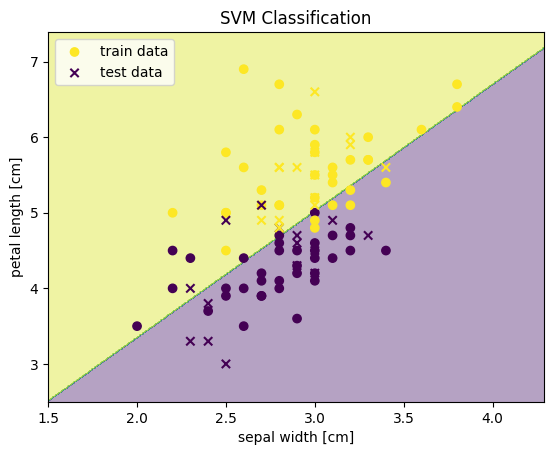

Accuracy: 0.8333333333333334


In [77]:
# sepal width と petal lengthの特徴量とversicolor（1）とvirginica（2）のターゲットをを抽出した2値分類←スクラッチ入門のときに使ったもの
# ScratchSVMCClassifierで学習・推定を行い、図示する

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Irisデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# versicolorとvirginicaのデータのみ抽出
X = X[y != 0]
y = y[y != 0]
y[y==1] = -1 # ラベルを-1と1に変換
y[y==2] = 1

# 特徴量をsepal widthとpetal lengthに限定
X = X[:, [1, 2]]

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# モデルのインスタンス化と学習
svm = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='linear', threshold=1e-5)
svm.fit(X_train, y_train)

# 推定
y_pred = svm.predict(X_test)

# 決定境界の描画
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)

# データ点の描画
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='test data')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM Classification')
plt.legend()
plt.show()

# 評価
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

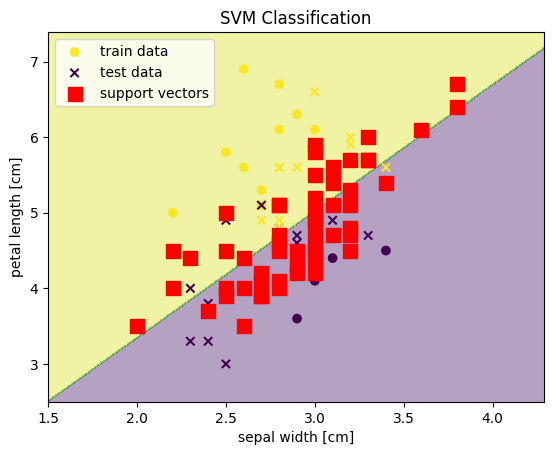

Accuracy: 0.8333333333333334


In [78]:
# 図示する時、サポートベクターを別の色で示すようにする

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Irisデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# versicolorとvirginicaのデータのみ抽出
X = X[y != 0]
y = y[y != 0]
y[y==1] = -1 # ラベルを-1と1に変換
y[y==2] = 1

# 特徴量をsepal widthとpetal lengthに限定
X = X[:, [1, 2]]

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# モデルのインスタンス化と学習
svm = ScratchSVMClassifier(num_iter=100, lr=0.01, kernel='linear', threshold=1e-5)
svm.fit(X_train, y_train)

# 推定
y_pred = svm.predict(X_test)

# 決定境界の描画
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)

# データ点の描画
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='test data')

# サポートベクターの描画 (異なる色で)
plt.scatter(svm.X_sv[:, 0], svm.X_sv[:, 1], s=100, c='red', marker='s', label='support vectors')


plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM Classification')
plt.legend()
plt.show()

# 評価
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")

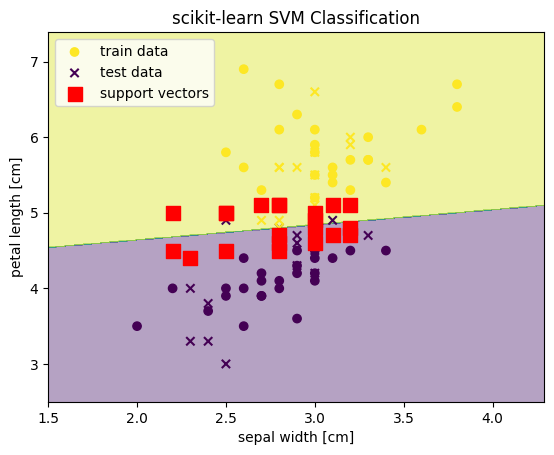

scikit-learn Accuracy: 0.8666666666666667


In [79]:
# scikit-learnによる実装でもAccuracyを求めて、同様に図示してみる

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# モデルのインスタンス化と学習
svm_sklearn = SVC(kernel='linear') # 線形カーネルを使用
svm_sklearn.fit(X_train, y_train)

# 推定
y_pred_sklearn = svm_sklearn.predict(X_test)

# 決定境界の描画
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)

# データ点の描画
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='test data')

# サポートベクターの描画 (異なる色で)
plt.scatter(svm_sklearn.support_vectors_[:, 0], svm_sklearn.support_vectors_[:, 1], s=100, c='red', marker='s', label='support vectors')


plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.title('scikit-learn SVM Classification')
plt.legend()
plt.show()


# 評価
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"scikit-learn Accuracy: {accuracy_sklearn}")

###4. SVMとはどのような仕組みか

決定境界は線形であれば、線形回帰やロジスティック回帰と同様に次の式です。

$y(x) = w^{T}x$

$x$ : 特徴量ベクトル

$w$ : 重みベクトル

決定境界とある点 $x$ との距離 $r$ は以下の式で求められます。高校数学で学ぶ「点と直線の距離の公式」や「点と平面の距離の公式」を一般化したものです。

$r = \frac{y_{i}y(x)}{||w||} = \frac{y_{i}w^{T}x}{||w||}$

$||w||$ はベクトル $w$ の大きさで、特徴量が2つならば $||w|| = \sqrt{w_{1}^2+w_{2}^2}$ です。また、学習するi番目のデータのラベルを $y_{i}=-1$または$y_{i}=1$ としています。

訓練データの中で「最も距離 $r$ が短くなる点x（サポートベクター）の距離 $r$ を最大化する $w$ を求める」ことがSVMによる分類だと言い換えられます。

これは非常に複雑な問題です。 $w$ を変化させると、最も距離 $r$ が短くなる点x（サポートベクター）も変化していくからです。計算するためには、問題を扱いやすい形に変形させる必要があります。

扱いやすい形にする
まず定数 $M(>0)$ を置くと、先ほどの問題は、

「$\frac{M}{||w||}$ を $y_{i}(w^{T}x_{i})\geq M$ という条件の元で最大化する $w$ や $M$ を求める問題」

と表現できます。条件式は $x_{i}$ に訓練データのすべての点を入れて成り立つ必要があります。まだまだややこしいですが、これをMで割ってしまいます。そうすると、

「$\frac{1}{||w||}$ を $y_{i}(\frac{w^{T}}{M}x_{i})\geq 1$ という条件の元で最大化する $w$ や $M$ を求める問題」

になり、さらに $w^{T} \gets \frac{w^{T}}{M}$ と置き換えてしまいます。

そうすれば、

「 $\frac{1}{||w||}$ を $y_{i}(w^{T}X_{i})\geq 1$ という条件の元で最大化する $w$を求める問題」

まで簡単化できます。 $\frac{1}{||w||}$ を最大化するというのは $||w||$ を最小化することと同じです。これを後々さらに扱いやすくするために $\frac{1}{2}||w||^2$ を最小化すると考えます。よって、

「 $\frac{1}{2}||w||^2$ を $y_{i}(w^{T}x_{i})\geq 1$ という条件の元で最小化する $w$ を求める問題」

とすることができます。


解きやすい問題にする（双対化）
こういった不等式制約を持つ最適化問題は次のように ラグランジュの未定乗数法 で置き換えられることが知られています。

なお、このように難しい問題を別の簡単な問題に言い換えることを 双対化する といいます。

ラグランジュの未定乗数法を用いると以下のラグランジュ関数が得られます。
………中略………
を $\lambda_{i} \geq 0$ かつ $\sum_{n=1}^{N}\lambda_{i}y_{i} = 0$ の条件の元で最大化するときの $\lambda_{i}$ を探す問題に双対化できます。

この形になれば、$\lambda$ を勾配降下法により求めることができます。$w$は出てきませんが、得られる結果は同じです。

##【問題6】多項式カーネル関数の作成

In [81]:
# 多項式カーネルにも切り替えられるように書き換える

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。
        """
        n_samples, n_features = X.shape
        self.lam = np.zeros(n_samples)

        for _ in range(self.iter):
            for i in range(n_samples):
                if self.kernel == 'linear':
                    gradient = 1 - y[i] * np.sum(self.lam * y * np.dot(X, X[i]))
                elif self.kernel == 'poly':
                    kernel_values = (np.dot(X, X[i]) + 1)**2  # 多項式カーネル！！！
                    gradient = 1 - y[i] * np.sum(self.lam * y * kernel_values)
                else:
                    raise ValueError("Invalid kernel type.")

                self.lam[i] += self.lr * gradient
                self.lam[i] = max(0, min(self.lam[i], 1))

            # サポートベクターの選択 (閾値を用いる)
            self.index_support_vectors = np.where(self.lam > self.threshold)[0]
            self.n_support_vectors = len(self.index_support_vectors)
            self.X_sv = X[self.index_support_vectors]
            self.lam_sv = self.lam[self.index_support_vectors]
            self.y_sv = y[self.index_support_vectors]

            if self.verbose:
                print(f"Iteration {_}: Number of support vectors = {self.n_support_vectors}")

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        """
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            if self.kernel == 'linear':
                kernel_values = np.dot(self.X_sv, X[i])
            elif self.kernel == 'poly':
                kernel_values = (np.dot(self.X_sv, X[i]) + 1)**2
            else:
                raise ValueError("Invalid kernel type.")
            y_pred[i] = np.sum(self.lam_sv * self.y_sv * kernel_values)

        return np.sign(y_pred)